# Example of Kalman Filter decoders

This example is similar to those shown in "Examples_all_decoders."
However, there is some preprocessing is different for the Kalman, so we have made a separate notebook.

In this example notebook, we:
1. Import the necessary packages
2. Load a data file (spike trains and outputs we are predicting)
3. Preprocess the data
4. Run the decoders and print the goodness of fit
5. Plot example decoded outputs

## 1. Import Packages

Below, we import both standard packages, and functions from the accompanying .py files

Note that you may need to specify the path below

In [1]:
## (Configuration) Allows you to return multiple variables from a single cell ##
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
## Allows you to import files from another folder in current directory ## 
import os 
import sys 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
#Import standard packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io
from scipy import stats
import pickle
import sys

#Import metrics
from Neural_Decoding.metrics import get_R2
from Neural_Decoding.metrics import get_rho

#Import decoder functions
from Neural_Decoding.decoders import KalmanFilterDecoder

## 2. Load Data
The data for this example can be downloaded at this [link](https://www.dropbox.com/s/e9mul73ur9omu5f/example_data_hc.pickle?dl=0).

It is the hc-2 dataset from [crcns](https://crcns.org/data-sets/hc/hc-2). Specifically, we use the dataset "ec014.333" 


The data that we load is in the format described below. We have another example notebook, "Example_format_data_hc", that may be helpful towards putting the data in this format.

Neural data should be a matrix of size "number of time bins" x "number of neurons", where each entry is the firing rate of a given neuron in a given time bin

The output you are decoding should be a matrix of size "number of time bins" x "number of features you are decoding"

In [4]:
# Opening Acc/Dec Data 
folder='/Users/rbhatt6/Documents/MATLAB/' #ENTER THE FOLDER THAT YOUR DATA IS IN

# Decoder Velocity Outputs
with open(folder+'sortInAccDec.pickle','rb') as f:
     sort_In=pickle.load(f,encoding='latin1') 
with open(folder+'sortOutXAccDec.pickle','rb') as f:
     sort_Out_X=pickle.load(f,encoding='latin1') 
with open(folder+'sortOutYAccDec.pickle','rb') as f:
     sort_Out_Y=pickle.load(f,encoding='latin1') 

# Decoder Position Outputs
with open(folder+'sortOutXAccDecPos.pickle','rb') as f:
     sort_Out_X_Pos=pickle.load(f,encoding='latin1') 
with open(folder+'sortOutYAccDecPos.pickle','rb') as f:
     sort_Out_Y_Pos=pickle.load(f,encoding='latin1') 

sort_Out_Y[0].shape
sort_Out_Y_Pos[0].shape
sort_In[0].shape

(1633, 1)

(1633, 1)

(1633, 90)

In [52]:
type(sort_In)
type(sort_In[0])

numpy.ndarray

numpy.ndarray

In [93]:
X_Acc[0].shape
type(X_Acc[0])
type(X_Acc)

sort_Out_X[0].shape
np.diff(sort_Out_X[0], axis = 0).shape
np.squeeze(np.diff(sort_Out_X[0], axis = 0)).shape

type(sort_Out_X)

test = np.array(X_Acc, dtype=object)
type(test)
test.shape
test[0].shape


(1633, 1)

numpy.ndarray

numpy.ndarray

(1633, 1)

(1632, 1)

(1632,)

numpy.ndarray

numpy.ndarray

(16,)

(1633, 1)

In [5]:
# Final output is vel, acc, pos

X_Comb_Kin = []
Y_Comb_Kin = []
for i in range(len(sort_Out_X)):
    # Concatenating vel with acc for X component
    temp1 = (np.diff(sort_Out_X[i], axis = 0))
    temp1 = np.concatenate((temp1,temp1[-1:,:]),axis=0)
    temp1 = np.array(np.concatenate((sort_Out_X[i], temp1, sort_Out_X_Pos[i]),axis=1))

    temp2 = (np.diff(sort_Out_Y[i], axis = 0))
    temp2 = np.concatenate((temp2,temp2[-1:,:]),axis=0)
    temp2 = np.array(np.concatenate((sort_Out_Y[i], temp2, sort_Out_Y_Pos[i]),axis=1))
    X_Comb_Kin.append(temp1)
    Y_Comb_Kin.append(temp2)

y_kf_X = np.array(X_Comb_Kin, dtype=object)
y_kf_Y = np.array(Y_Comb_Kin, dtype=object)

# y_kf_X_Comp=np.concatenate((sort_Out_X,X_Acc),axis=0)
# y_kf_Y_Comp=np.concatenate((sort_Out_Y,Y_Acc),axis=0)

X_Comb_Kin[0].shape
Y_Comb_Kin[0].shape

(1633, 3)

(1633, 3)

In [106]:
# Final output is vel, acc

X_Acc = []
Y_Acc = []
for i in range(len(sort_Out_X)):
    # Concatenating vel with acc for X component
    temp1 = (np.diff(sort_Out_X[i], axis = 0))
    temp1 = np.concatenate((temp1,temp1[-1:,:]),axis=0)
    temp1 = np.array(np.concatenate((sort_Out_X[i], temp1),axis=1))

    temp2 = (np.diff(sort_Out_Y[i], axis = 0))
    temp2 = np.concatenate((temp2,temp2[-1:,:]),axis=0)
    temp2 = np.array(np.concatenate((sort_Out_Y[i], temp2),axis=1))
    X_Acc.append(temp1)
    Y_Acc.append(temp2)

y_kf_X = np.array(X_Acc, dtype=object)
y_kf_Y = np.array(Y_Acc, dtype=object)

X_Acc[0].shape
Y_Acc[0].shape

(1633, 2)

(1633, 2)

In [99]:
#X_Acc = np.empty([16,1])
X_Acc = []
Y_Acc = []
for i in range(len(sort_Out_X)):
    temp1 = (np.diff(sort_Out_X[i], axis = 0))
    temp1 = np.array(np.concatenate((temp1,temp1[-1:,:]),axis=0))
    temp2 = (np.diff(sort_Out_Y[i], axis = 0))
    temp2 = np.array(np.concatenate((temp2,temp2[-1:,:]),axis=0))
    X_Acc.append(temp1)
    Y_Acc.append(temp2)

X_Acc = np.array(X_Acc, dtype=object)
Y_Acc = np.array(Y_Acc, dtype=object)

# y_kf_X_Comp=np.concatenate((sort_Out_X,X_Acc),axis=0)
# y_kf_Y_Comp=np.concatenate((sort_Out_Y,Y_Acc),axis=0)


(32,)

## 3. Preprocess Data

### 3A. User Inputs
The user can define what time period to use spikes from (with respect to the output).

In [6]:
lag=0 #What time bin of spikes should be used relative to the output
#(lag=-1 means use the spikes 1 bin before the output)

### 3B. Format Covariates

#### Format Input

In [6]:
#Remove neurons with too few spikes in HC dataset
nd_sum=np.nansum(neural_data,axis=0) #Total number of spikes of each neuron
rmv_nrn=np.where(nd_sum<100) #Find neurons who have less than 100 spikes total
neural_data=np.delete(neural_data,rmv_nrn,1) #Remove those neurons

In [12]:
#The covariate is simply the matrix of firing rates for all neurons over time
X_kf=neural_data
X_kf.shape

(28039, 46)

#### Format Output

In [14]:
#For the Kalman filter, we use the position, velocity, and acceleration as outputs
#Ultimately, we are only concerned with the goodness of fit of position (for this dataset)
#But using them all as covariates helps performance

#We now determine velocity
temp=np.diff(pos_binned,axis=0)
vels_binned=np.concatenate((temp,temp[-1:,:]),axis=0)

#We now determine acceleration
temp2=np.diff(vels_binned,axis=0)
acc_binned=np.concatenate((temp2,temp2[-1:,:]),axis=0)

y_kf=np.concatenate((pos_binned,vels_binned,acc_binned),axis=1)

temp.shape
y_kf.shape

(28038, 2)

(28039, 6)

In [15]:
#Remove time bins with no output (y value)
rmv_time=np.where(np.isnan(y_kf[:,0]) | np.isnan(y_kf[:,1]))
X_kf=np.delete(X_kf,rmv_time,0)
y_kf=np.delete(y_kf,rmv_time,0)

### 3C. Take lag into account

In [19]:
num_examples=X_kf.shape[0]

#Re-align data to take lag into account
if lag<0:
    y_kf=y_kf[-lag:,:]
    X_kf=X_kf[0:num_examples+lag,:]
if lag>0:
    y_kf=y_kf[0:num_examples-lag,:]
    X_kf=X_kf[lag:num_examples,:]

### 3D. Split into training/testing/validation sets
Note that parameters should be setting using a separate validation set. 
Then, the goodness of fit should be be tested on a testing set (separate from the training and validation sets).

### User Options

In [7]:
#Set what part of data should be part of the training/testing/validation sets
#Note that there was a long period of no movement after about 80% of recording, so I did not use this data.
# training_range=[0, 0.5]
# valid_range=[0.5,0.65]
# testing_range=[0.65, 0.8]

training_range=[0, 0.8]
valid_range=[0.8,0.9]
testing_range=[0.9, 1]

### Split Data: For KF

In [21]:
#Number of examples after taking into account bins removed for lag alignment
num_examples_kf=X_kf.shape[0]
        
#Note that each range has a buffer of 1 bin at the beginning and end
#This makes it so that the different sets don't include overlapping data
training_set=np.arange(np.int(np.round(training_range[0]*num_examples_kf))+1,np.int(np.round(training_range[1]*num_examples_kf))-1)
testing_set=np.arange(np.int(np.round(testing_range[0]*num_examples_kf))+1,np.int(np.round(testing_range[1]*num_examples_kf))-1)
valid_set=np.arange(np.int(np.round(valid_range[0]*num_examples_kf))+1,np.int(np.round(valid_range[1]*num_examples_kf))-1)

#Get training data
X_kf_train=X_kf[training_set,:]
y_kf_train=y_kf[training_set,:]

#Get testing data
X_kf_test=X_kf[testing_set,:]
y_kf_test=y_kf[testing_set,:]

#Get validation data
X_kf_valid=X_kf[valid_set,:]
y_kf_valid=y_kf[valid_set,:]

<ipython-input-21-9f25b06ebb21>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  training_set=np.arange(np.int(np.round(training_range[0]*num_examples_kf))+1,np.int(np.round(training_range[1]*num_examples_kf))-1)
<ipython-input-21-9f25b06ebb21>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cur

### 3E. Preprocessing: Normalization and zero-centering
We normalize (z_score) the inputs and zero-center the outputs.
Parameters for z-scoring (mean/std.) should be determined on the training set only, and then these z-scoring parameters are also used on the testing and validation sets.

In [22]:
#Z-score inputs 
X_kf_train_mean=np.nanmean(X_kf_train,axis=0)
X_kf_train_std=np.nanstd(X_kf_train,axis=0)
X_kf_train=(X_kf_train-X_kf_train_mean)/X_kf_train_std
X_kf_test=(X_kf_test-X_kf_train_mean)/X_kf_train_std
X_kf_valid=(X_kf_valid-X_kf_train_mean)/X_kf_train_std

#Zero-center outputs
y_kf_train_mean=np.mean(y_kf_train,axis=0)
y_kf_train=y_kf_train-y_kf_train_mean
y_kf_test=y_kf_test-y_kf_train_mean
y_kf_valid=y_kf_valid-y_kf_train_mean

### Kalman Filter

In [130]:
type(sort_Out_X[0])
test = np.concatenate((sort_Out_X[0], sort_Out_Y[0]),1) # concatenate by columns
test.shape

numpy.ndarray

(1633, 2)

In [17]:
kf_Rho_Y_Comp = []
kf_R2s_Y_Comp = []

for i in range(len(sort_In)):
    X_kf = sort_In[i]
    y_kf = y_kf_X[i]
    num_examples_kf=X_kf.shape[0] # nRows (b/c nCols = number of units)

    #Note that each range has a buffer of 1 bin at the beginning and end
    #This makes it so that the different sets don't include overlapping data
    training_set=np.arange(int(np.round(training_range[0]*num_examples_kf))+1,int(np.round(training_range[1]*num_examples_kf))-1)
    testing_set=np.arange(int(np.round(testing_range[0]*num_examples_kf))+1,int(np.round(testing_range[1]*num_examples_kf))-1)
    valid_set=np.arange(int(np.round(valid_range[0]*num_examples_kf))+1,int(np.round(valid_range[1]*num_examples_kf))-1)

    #Get training data
    X_kf_train=X_kf[training_set,:]
    y_kf_train=y_kf[training_set,:]

    #Get testing data
    X_kf_test=X_kf[testing_set,:]
    y_kf_test=y_kf[testing_set,:]

    #Get validation data
    X_kf_valid=X_kf[valid_set,:]
    y_kf_valid=y_kf[valid_set,:]

    #Z-score inputs 
    X_kf_train_mean=np.nanmean(X_kf_train,axis=0)
    X_kf_train_std=np.nanstd(X_kf_train,axis=0)
    X_kf_train=(X_kf_train-X_kf_train_mean)/X_kf_train_std
    X_kf_test=(X_kf_test-X_kf_train_mean)/X_kf_train_std
    X_kf_valid=(X_kf_valid-X_kf_train_mean)/X_kf_train_std

    #Zero-center outputs
    y_kf_train_mean=np.mean(y_kf_train,axis=0)
    y_kf_train=y_kf_train-y_kf_train_mean
    y_kf_test=y_kf_test-y_kf_train_mean
    y_kf_valid=y_kf_valid-y_kf_train_mean

    #Declare model
    model_kf=KalmanFilterDecoder(C=1) #There is one optional parameter (see ReadMe)

    #Fit model
    model_kf.fit(X_kf_train,y_kf_train)

    #Get predictions
    y_valid_predicted_kf=model_kf.predict(X_kf_valid,y_kf_valid)

    #Get metrics of fit (see read me for more details on the differences between metrics)
    #First I'll get the R^2
    R2_kf=get_R2(y_kf_valid,y_valid_predicted_kf)
    #print('R2:',R2_kf[0:2]) #I'm just printing the R^2's of the 1st and 2nd entries that correspond to the positions
    kf_R2s_Y_Comp.append(R2_kf)

    #Next I'll get the rho^2 (the pearson correlation squared)
    rho_kf=get_rho(y_kf_valid,y_valid_predicted_kf)
    #print('rho2:',rho_kf[0:2]**2) #I'm just printing the rho^2's of the 1st and 2nd entries that correspond to the positions
    kf_Rho_Y_Comp.append(rho_kf)

In [20]:
# kf_R2s_X_Comp
# kf_Rho_X_Comp
# kf_R2s_Y_Comp
# kf_Rho_Y_Comp

# Saving results in a matlab file 

from scipy.io import savemat
import numpy

L = [kf_R2s_X_Comp, kf_Rho_X_Comp, kf_R2s_Y_Comp, kf_Rho_Y_Comp]

FrameStack = np.empty((4,), dtype=object)
for i in range(len(L)):
    FrameStack[i] = L[i]

savemat("KalmanModelOutputs.mat", {"KalmanOuputs":FrameStack})

In [23]:
#Declare model
model_kf=KalmanFilterDecoder(C=5) #There is one optional parameter (see ReadMe)

#Fit model
model_kf.fit(X_kf_train,y_kf_train)

#Get predictions
y_valid_predicted_kf=model_kf.predict(X_kf_valid,y_kf_valid)

#Get metrics of fit (see read me for more details on the differences between metrics)
#First I'll get the R^2
R2_kf=get_R2(y_kf_valid,y_valid_predicted_kf)
print('R2:',R2_kf[0:2]) #I'm just printing the R^2's of the 1st and 2nd entries that correspond to the positions
#Next I'll get the rho^2 (the pearson correlation squared)
rho_kf=get_rho(y_kf_valid,y_valid_predicted_kf)
print('rho2:',rho_kf[0:2]**2) #I'm just printing the rho^2's of the 1st and 2nd entries that correspond to the positions

R2: [0.2734179  0.43781231]
rho2: [0.31974362 0.45936538]


## 5. Make Plots

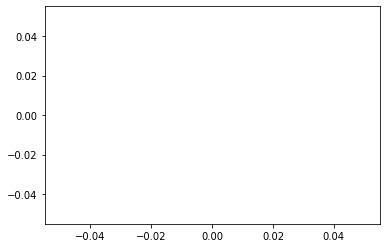

In [137]:
#As an example, I plot an example 3000 values of the x position (column index 0), both true and predicted with the Kalman filter
#Note that I add back in the mean value, so that both true and predicted values are in the original coordinates
fig_x_kf=plt.figure()
plt.plot(y_kf_valid[2000:5000,0]+y_kf_train_mean[0],'b')
plt.plot(y_valid_predicted_kf[2000:5000,0]+y_kf_train_mean[0],'r')
#Save figure
# fig_x_kf.savefig('x_position_decoding.eps')